Neuron 

a = sum of inputs * weights + bias
These are the linear expression.
The purpose of the activation function is the decision function. 
Sigmoid is only good for extent value. 

Derivative - how much error there is in the given model. 
If the value goes to the negative territory, naa siya sa vanishing derivative. 
If big loss, dako ang usab. So sigmoid is getting bad. 

Sigmoid = 1/ 1+ exp^-x
So the  better activation function is the Relu. 
Relu = max(x, 1)

TanH is like the Sigmoid function but it is in the negative chuchu.
HIDDEN LAYER = relu
OUTPUT = ?

Leaky Relu - naa slight nga edges/ Mas dugay ang training for tanh ug relu.

WHICH ACTIVATION FUNCTION TO USE?
- No magic formula
- Different properties


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

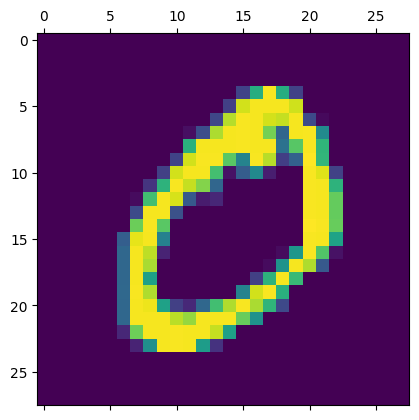

In [5]:
plt.matshow(x_train[1])

In [6]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_train_flattened[0]

print(x_train[0].shape)
# When you normalize the data the y_test is the same as the x_test which is 7.
x_train_flattened = x_train_flattened/255
x_test_flattened = x_test_flattened/255
x_train_flattened.shape

(28, 28)


(60000, 784)

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='sigmoid')) # called dense because it is connected to the each other neuron
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# BUILD THE MODEL
model.fit(x_train_flattened, y_train, epochs = 5)
# Converting or using the keras.layers.FLatten(input_shape=(28,28)) good for the dynamic data into a single line
# Categorical Entropy Vs. Sparse Entropy
# Sigmoid is between 0-1
# if categorical entropy pangitaon niya ang pinakadako nga value sa layer 
# sparse will just give you the number
# STUDY KERAS LOSSES in TENSORFLOW


c:\Users\Acer Aspire 7\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8092 - loss: 0.7250
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9134 - loss: 0.3105
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9187 - loss: 0.2901
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9242 - loss: 0.2698
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9265 - loss: 0.2611


In [8]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9136 - loss: 0.3032


[0.27015429735183716, 0.9248999953269958]

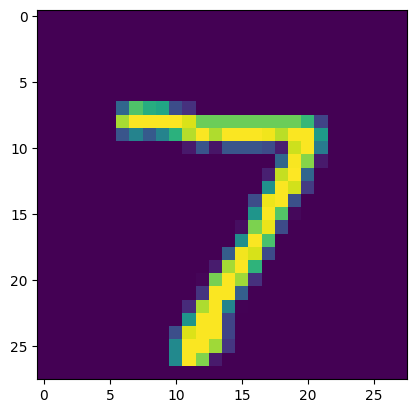

In [15]:
plt.imshow(x_test[0])

In [10]:
y_test[0]

np.uint8(7)

In [12]:
y_predicted = model.predict(x_test_flattened)
np.argmax(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
# y_predicted_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    1,    2,    0],
       [   0, 1109,    4,    1,    0,    1,    4,    2,   14,    0],
       [   5,   11,  915,   15,    9,    6,   11,    9,   48,    3],
       [   4,    1,   16,  908,    0,   27,    2,   12,   34,    6],
       [   2,    1,    5,    1,  922,    0,    8,    4,   11,   28],
       [   9,    3,    3,   24,    8,  790,   10,    4,   34,    7],
       [  14,    3,    9,    1,    8,   19,  897,    1,    6,    0],
       [   1,    5,   21,    7,    7,    1,    0,  953,    6,   27],
       [   5,    8,    5,   15,    9,   25,    6,    8,  889,    4],
       [   9,    7,    1,    9,   41,    6,    0,   22,   14,  900]],
      dtype=int32)>

Text(33.22222222222222, 0.5, 'Truth')

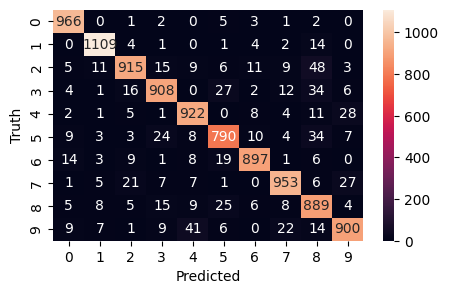

In [20]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(784,), activation='relu')) # called dense because it is connected to the each other neuron
model.add(Dense(100,activation='softmax'))
model.add(Dense(100,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(10, activation='sigmoid')) # called dense because it is connected to the each other neuron
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# BUILD THE MODEL
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7656 - loss: 0.7414
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9563 - loss: 0.1523
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9690 - loss: 0.1041
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9750 - loss: 0.0841
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9817 - loss: 0.0632


In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(784,), activation='relu')) # called dense because it is connected to the each other neuron
model.add(Dense(10, activation='sigmoid')) # called dense because it is connected to the each other neuron
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# BUILD THE MODEL
model.fit(x_train_flattened, y_train, epochs = 5)